In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal


In [5]:
lee_ferry = pd.read_csv('LeesFerry-monflows-1906-2016.txt', delimiter=' ', header=None)
lee_ferry.columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
lee_ferry = lee_ferry.set_index('Year')
lee_ferry

,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1906,244314,292534,678174,1204640,3635101,5014167,2950460,1605086,1503159,739807,503006,353312
1907,356760,377349,789130,1465838,2702179,5967232,5103491,1920787,955414,608812,377467,268130
1908,276192,379543,664762,1041224,1595614,2922360,1924283,1117477,598088,483627,395707,312145
1909,378989,317458,763721,1120492,3349297,7203254,4109919,1880422,1526396,680646,489990,377548
1910,289322,493565,1403871,1730475,3298793,3101705,1373125,866631,630999,616468,445769,345922
...,...,...,...,...,...,...,...,...,...,...,...,...
2012,381442,384326,733774,1222586,1362700,1079225,744933,636178,375426,344045,314021,225025
2013,214584,289629,359208,546319,1965060,1964812,874772,727596,1147550,647503,522374,337385
2014,309820,374229,562920,1269132,2932034,3933465,1527985,899893,788861,881584,466760,423745


### 1. Bivariate PDF's
-> The joint distribution of two continuous random variables. 

#### (i) Plot the bivariate normal PDF

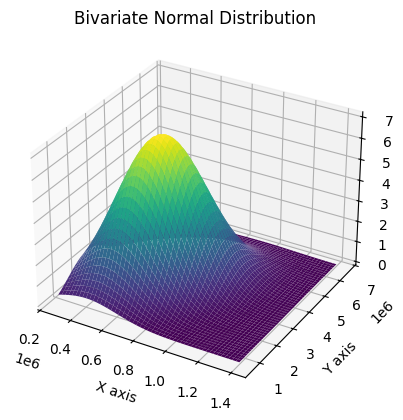

In [ ]:
mean_march = float(lee_ferry['Mar'].mean())
mean_may = float(lee_ferry['May'].mean())
march = lee_ferry['Mar'].values
may = lee_ferry['May'].values

mean = [mean_march, mean_may] #mean values of each array
covariance = np.cov(march, may) #variance of each variable and the covariance between them. Covariances should be the same and is the degree to which two variables change together


x = np.linspace(march.min(), march.max(), 1000)
y = np.linspace(may.min(), may.max(), 1000)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
rv = multivariate_normal(mean, covariance)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos), cmap='viridis', edgecolor='none')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Probability Density')
plt.title('Bivariate Normal Distribution')
plt.show()

#### (ii) Plot the conditional PDF for Y, for X = 0.6 MaF and X = 0.8MaF
-> used to calculate the mean and variance for specific values of one variable, specifically the two given variables of 'X' in this case, and plot 

In [ ]:
mean_march = float(lee_ferry['Mar'].mean())
mean_may = float(lee_ferry['May'].mean())
march = lee_ferry['Mar'].values
may = lee_ferry['May'].values

mean = [mean_march, mean_may] #mean values of each array
covariance = np.cov(march, may) #variance of each variable and the covariance between them. Covariances should be the same and is the degree to which two variables change together


x = np.linspace(march.min(), march.max(), 1000)
y = np.linspace(may.min(), may.max(), 1000)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
rv = multivariate_normal(mean, covariance)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos), cmap='viridis', edgecolor='none')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Probability Density')
plt.title('Bivariate Normal Distribution')
plt.show()